# THEA 


Author: lesotlho koorapetse, Research Topic: Lightweight Deep Learning for Real-time Polyp Identification and Segmentation in Colonoscopy: The Nano-Net Approach

A thesis submitted to Xi’an Jiaotong University   in partial fulfillment of the requirements for the degree of Master of Computer Science and Technology


In [20]:
import tensorflow as tf
import numpy as np
np.random.seed(1000)
import cv2
import splitfolders
import os
from PIL import Image
import keras
import random
import matplotlib.pyplot as plt
from PIL import Image
os.environ['thea'] = 'tensorflow'


# Data Spliting

In [21]:
input_folder = '/thea/sources/Data/data_train/'
output_folder = '/thea/sources/Data/data/'
splitfolders.ratio(input_folder, output_folder, seed =42, ratio=(.8, .2), group_prefix=None)


Copying files: 2000 files [00:05, 399.58 files/s]


# Read images

In [3]:
train_img_dir = '/thea/sources/Data/Data/train/images/'
mask_img_dir = '/thea/sources/Data/Data/train/masks/'


In [4]:

img_list = os.listdir(train_img_dir)
img_list.sort()
mask_list = os.listdir(mask_img_dir )
mask_list.sort()

num_images= len(os.listdir(train_img_dir))

print("total number of training images are: ", num_images)

total number of training images are:  962


In [5]:
image_directory = '/thea/sources/Data/Data/'
SIZE = 64
dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
label = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.

train_images = os.listdir(image_directory + 'train/images/')
for i, image_name in enumerate(train_images):    #Remember enumerate method adds a counter and returns the enumerate object
    
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'train/images/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

#Iterate through all images in Uninfected folder, resize to 64 x 64
#Then save into the same numpy array 'dataset' but with label 1

val_images = os.listdir(image_directory + 'val/images/')
for i, image_name in enumerate(val_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'val/images/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

# Random Checking if Data is aligned

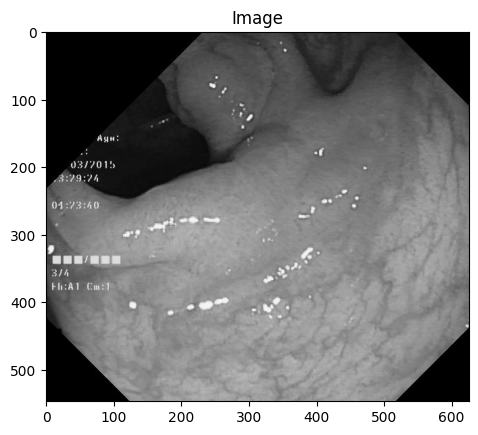

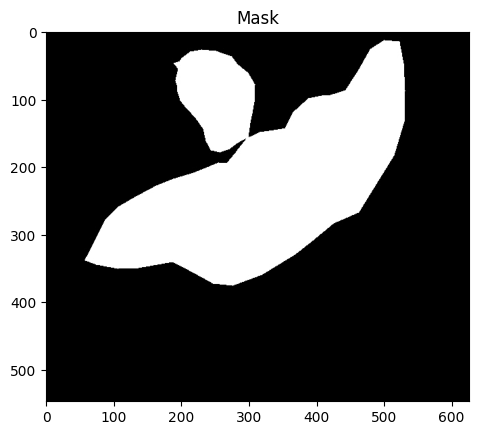

In [18]:
img_num = random.randint(0, num_images-1)

img_for_plot = cv2.imread(train_img_dir+img_list[img_num], 0)
mask_for_plot = cv2.imread(mask_img_dir+mask_list[img_num], 0)

plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(img_for_plot, cmap = 'gray')
plt.title('Image')

plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(mask_for_plot, cmap = 'gray')
plt.title('Mask')

plt.show()

# BUILDING MODEL

In [6]:
INPUT_SHAPE = (64, 64, 3)   #change to (SIZE, SIZE, 3)
inp = keras.layers.Input(shape=INPUT_SHAPE)

conv1 = keras.layers.Conv2D(32, kernel_size=(3, 3), 
                               activation='relu', padding='same')(inp)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
norm1 = keras.layers.BatchNormalization(axis = -1)(pool1)
drop1 = keras.layers.Dropout(rate=0.2)(norm1)
conv2 = keras.layers.Conv2D(32, kernel_size=(3, 3), 
                               activation='relu', padding='same')(drop1)
pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
norm2 = keras.layers.BatchNormalization(axis = -1)(pool2)
drop2 = keras.layers.Dropout(rate=0.2)(norm2)

flat = keras.layers.Flatten()(drop2)  #Flatten the matrix to get it ready for dense.

hidden1 = keras.layers.Dense(512, activation='relu')(flat)
norm3 = keras.layers.BatchNormalization(axis = -1)(hidden1)
drop3 = keras.layers.Dropout(rate=0.2)(norm3)
hidden2 = keras.layers.Dense(256, activation='relu')(drop3)
norm4 = keras.layers.BatchNormalization(axis = -1)(hidden2)
drop4 = keras.layers.Dropout(rate=0.2)(norm4)

out = keras.layers.Dense(2, activation='sigmoid')(drop4)   #units=1 gives error

model = keras.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam',
                loss='categorical_crossentropy',   #Check between binary_crossentropy and categorical_crossentropy
                metrics=['accuracy'])

print(model.summary())

model.save('/thea/sources/models/model_pilot.h5')


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248  

In [7]:
from keras import layers

INPUT_SHAPE = (64, 64, 3)

inp = layers.Input(shape=INPUT_SHAPE)

# Add 2-3 more Conv2D layers with increasing number of filters, 
# to extract more features from the input image
conv1 = layers.Conv2D(32, kernel_size=(3, 3), 
                      activation='relu', padding='same')(inp)
conv2 = layers.Conv2D(64, kernel_size=(3, 3), 
                      activation='relu', padding='same')(conv1)
conv3 = layers.Conv2D(128, kernel_size=(3, 3), 
                      activation='relu', padding='same')(conv2)
pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)
norm1 = layers.BatchNormalization(axis = -1)(pool1)
drop1 = layers.Dropout(rate=0.3)(norm1)

# Add a similar set of layers as before, but with dropout rate = 0.4
conv4 = layers.Conv2D(32, kernel_size=(3, 3), 
                      activation='relu', padding='same')(drop1)
conv5 = layers.Conv2D(64, kernel_size=(3, 3), 
                      activation='relu', padding='same')(conv4)
conv6 = layers.Conv2D(128, kernel_size=(3, 3), 
                      activation='relu', padding='same')(conv5)
pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv6)
norm2 = layers.BatchNormalization(axis = -1)(pool2)
drop2 = layers.Dropout(rate=0.4)(norm2)

flat = layers.Flatten()(drop2)

hidden1 = layers.Dense(512, activation='relu')(flat)
norm3 = layers.BatchNormalization(axis = -1)(hidden1)
drop3 = layers.Dropout(rate=0.4)(norm3)
hidden2 = layers.Dense(256, activation='relu')(drop3)
norm4 = layers.BatchNormalization(axis = -1)(hidden2)
drop4 = layers.Dropout(rate=0.4)(norm4)

# Add a final dense layer with 'softmax' activation 
# for multi-class classification
out = layers.Dense(2, activation='softmax')(drop4)

model = keras.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


print(model.summary())

model.save('/thea/sources/models/model_p.h5')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 128)      512       
 hNormalization)                                           

# SPLIT DATA INTO TRAINING AND TEST SETS


Epoch 1/200
14/14 [==============================] - 63s 4s/step - loss: 1.7146 - accuracy: 0.5666 - val_loss: 10.7728 - val_accuracy: 0.6980
Epoch 2/200
14/14 [==============================] - 64s 5s/step - loss: 0.8398 - accuracy: 0.6652 - val_loss: 12.0169 - val_accuracy: 0.7181
Epoch 3/200
14/14 [==============================] - 69s 5s/step - loss: 0.7722 - accuracy: 0.6764 - val_loss: 1.4254 - val_accuracy: 0.7215
Epoch 4/200
14/14 [==============================] - 90s 7s/step - loss: 0.6100 - accuracy: 0.7077 - val_loss: 1.5280 - val_accuracy: 0.7349
Epoch 5/200
14/14 [==============================] - 95s 7s/step - loss: 0.6363 - accuracy: 0.6999 - val_loss: 0.8728 - val_accuracy: 0.7181
Epoch 6/200
14/14 [==============================] - 93s 7s/step - loss: 0.6300 - accuracy: 0.6920 - val_loss: 0.9707 - val_accuracy: 0.6946
Epoch 7/200
14/14 [==============================] - 94s 7s/step - loss: 0.6131 - accuracy: 0.7122 - val_loss: 0.6919 - val_accuracy: 0.7181
Epoch 8/200

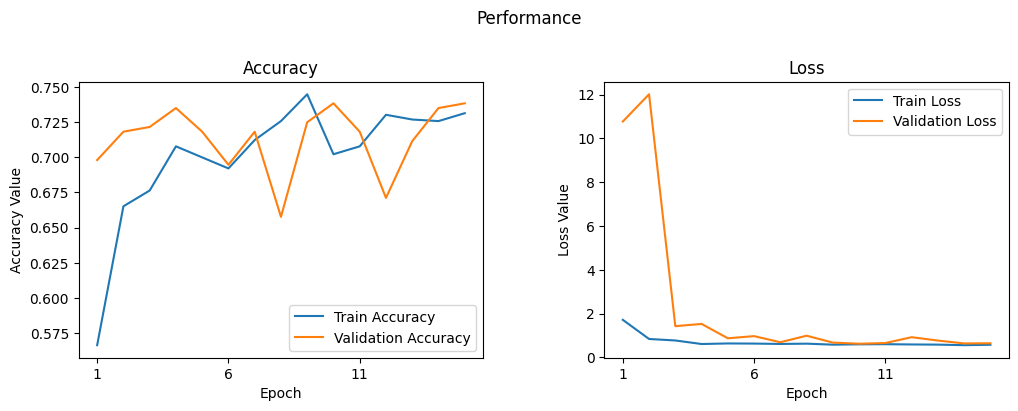

In [14]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

import matplotlib.pyplot as plt

# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='autograh')

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(dataset, 
                                                  to_categorical(np.array(label)), 
                                                  test_size = 0.1, 
                                                  random_state = 0)

# Use early stopping to terminate training early if the model stops improving
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

#Fit the model
history = model.fit(np.array(X_train), 
                    y_train, 
                    batch_size = 64, 
                    verbose = 1, 
                    epochs =200,                             
                    validation_split = 0.25,
                    callbacks=[early_stop],
                    shuffle = True)
                    

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(np.array(X_test), np.array(y_test))
print("Test Accuracy: {:.2f}%".format(test_acc*100))

# Plot the training and validation accuracy/loss
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Performance', fontsize=12)
f.subplots_adjust(top=0.8, wspace=0.3)

max_epoch = len(history.history['accuracy'])
epoch_list = list(range(1,max_epoch+1))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch+1, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch+1, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")


#Save the model
model.save('/thea/sources/models/model_p.h5')

